In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
#Define File Path
path = 'Raw_Data/Blackwell_Hist_Sample.csv'

#Load the file as a data frame (df)
df = pd.read_csv(filepath_or_buffer= path)

#Summarize/describe the df
df.describe()

,in.store,age,items,amount,region
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.455500,45.956500,4.50390,835.000181,2.659700
std,0.498041,15.902261,2.06611,723.099002,1.128904
min,0.000000,18.000000,1.00000,5.230000,1.000000
25%,0.000000,33.000000,3.00000,276.752500,2.000000
50%,0.000000,45.000000,4.00000,570.665000,3.000000
75%,1.000000,57.000000,6.00000,1249.900000,4.000000
max,1.000000,85.000000,8.00000,2999.200000,4.000000


In [4]:
#Descritize Age & Amount

#Setup Descritizer Fxns
descrt_4b = KBinsDiscretizer(n_bins=4, encode='ordinal')
descrt_3b = KBinsDiscretizer(n_bins=3, encode='ordinal')

#fetch columns to descritize and format into (n,1) array using .reshape(-1,1)
age_array = np.array(df['age']).reshape(-1,1)
amount_array = np.array(df['amount']).reshape(-1,1)

age_bin_array = descrt_4b.fit_transform(age_array)
amount_bin_array = descrt_3b.fit_transform(amount_array)

In [5]:
#Replace continuous data with bins in original df
df['age'] = age_bin_array
df['amount'] = amount_bin_array
df.describe()

,in.store,age,items,amount,region
count,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.455500,1.52230,4.50390,1.000100,2.659700
std,0.498041,1.10708,2.06611,0.816558,1.128904
min,0.000000,0.00000,1.00000,0.000000,1.000000
25%,0.000000,1.00000,3.00000,0.000000,2.000000
50%,0.000000,2.00000,4.00000,1.000000,3.000000
75%,1.000000,3.00000,6.00000,2.000000,4.000000
max,1.000000,3.00000,8.00000,2.000000,4.000000


In [15]:
#Run Decision Tree
features_labels = ['in.store','age','items','amount']
class_label = 'region'

X = df[features_labels]
Y = df[class_label]

clf = tree.DecisionTreeClassifier(max_depth = 10)
clf = clf.fit(X, Y)

#Perform cross_validation_Score on K-fold split with K=10
scores = cross_val_score(clf, X, y, cv=10)
pd.DataFrame(scores, columns = ['Accuracy (Score)']).describe()                                      

,Accuracy (Score)
count,10.000000
mean,0.589503
std,0.013810
min,0.568136
25%,0.584331
50%,0.587086
75%,0.590193
max,0.619238


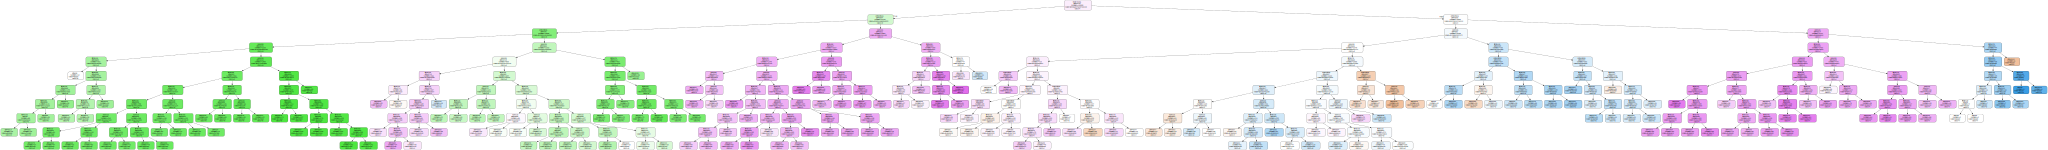

In [16]:
#View the tree
import graphviz 
otuput = tree.export_graphviz(clf, 
                             feature_names=features_labels,  
                             class_names=class_label,  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source(otuput)  
graph 

In [ ]:
from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> iris = load_iris()
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(iris.data, iris.target)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

print(__doc__)

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10)
X_binned = enc.fit_transform(X)

Automatically created module for IPython interactive environment


In [23]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>